# Asyncio Module

In general,it is easy to predict the output of a program which flows in sequence.But What if it doesnt...

Example:
we are accessing three servers in sequence manner.If the first access long time and second access takes more than 10 seconds..The CPU sits idle for all the time.

Instead we can send seperate process to each Server.

This is Asynchronous programming.

Lets understand some of the basic terms for Asynchronous Programming.

Coroutine — generator that consumes data, but doesn’t generate it.

Tasks     — schedulers for coroutines.

Event Loop — think of it as the central executor in asyncio.

## Yield Vs Returns

The yield statement suspends function’s execution and sends a value back to caller, but retains enough state to enable function to resume where it is left off. When resumed, the function continues execution immediately after the last yield run. This allows its code to produce a series of values over time, rather them computing them at once and sending them back like a list.

Return returns the value to the function and loses the function's state.The called function will not continue to run after a return statement.

# Generators
A generator is a function that produces a sequence of results instead of a single value
Behavior is quite different than normal function.When we call the function is started from scratch. It’s one time execution. But a generator function can yield a value and pause the execution of the function. The control is returned to the calling scope.

You can generate large list of numbers without storing them in a list. 

1. Calling a generator function creates an generator object. However, it does not start running the function.

2. The function only executes on next().

3. Function resumes on next call to next()

In [3]:
#Example 1
#Generator Function - A Function which includes yield,Yield is used to suspend a function and gives the control to 
# the calling function.

def simple_gen():
    yield "Hello"
    yield "World"
 
 
gen = simple_gen()
print("First "+next(gen))
print("Second "+next(gen))

First Hello
Second World


In [4]:
#Example 2
#Generator Function
def countdown(n):
    while n > 0:
        yield n
        n-=1
count = countdown(5)#creating generator object
print(count)
#The function is now called
print(count.__next__())#The yield returns a value and the function got suspended


<generator object countdown at 0x000001D3AD146360>
5


## Coroutines
The Problems with threads are:

1. Threads require a lot of memory, about 8MB per executing thread.

2. They require tools to coordinate them.

3. Threads are costly to start.

Python generator functions can also consume values using a (yield) statement. In addition two new methods on generator objects, send() and close(), create a framework for objects that consume and produce values. 

Generator functions that define these objects are coroutines. 

In [36]:
#Coroutine using async/await
async def coro_function():
    return 2 + 2

async def main():
    coro =  coro_function()
    # not executed yet; coro is a coroutine, not 4
    print(await coro)
    # prints "4"
    
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

4


## Producer Filter and Consumer
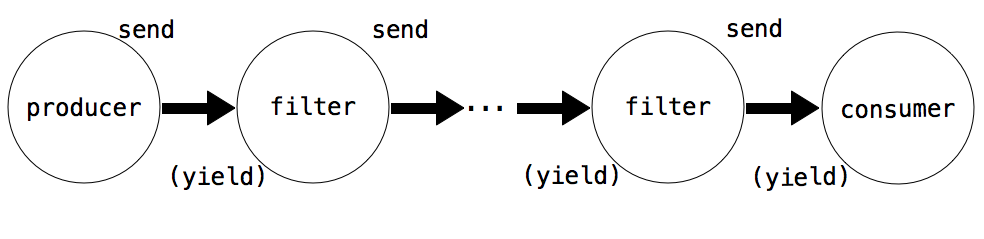

A Producer creates items in a series and uses send(), but not (yield)

A Filter uses (yield) to consume items and send() to send result to a next step.

A Consumer uses (yield) to consume items, but does not send.

In [5]:
#Producer Coroutine
def read(text, next_coroutine):
        for line in text.split():
            next_coroutine.send(line)# 8. Sends value to  the filter function
            next_coroutine.close()

In [6]:
#Filter Coroutine
def match_filter(pattern, next_coroutine):
        print('Looking for ' + pattern)
        try:
            while True:
                s = (yield)#6. returns control to the calling function
                           #9. After receiving the value from the read function it continues
                if pattern in s:
                    next_coroutine.send(s)#10. Sends value to the Consumer function
        except GeneratorExit:
            next_coroutine.close()

In [7]:
#Consumer Coroutine
def print_consumer():
        print('Preparing to print')
        try:
            while True:
                line = (yield)#3. returning control to the calling function
                print(line)# 11. Prints here
        except GeneratorExit:
            print("=== Done ===")

In [8]:
printer = print_consumer()#1. Creates a generator object and does nothing
printer.__next__()        #2. Executes the function and prints "Preparing to print" and stops at yield
matcher = match_filter('pend', printer)#4. Creates another Generator object and does nothing
matcher.__next__()#5. Executes the function and stops at yield
read("spending", matcher)#7. Producer is called and it sends value to the filter function

Preparing to print
Looking for pend
spending
=== Done ===


## Event Loop
An event loop essentially manages and distributes the execution of different tasks. It registers them and handles distributing the flow of control between them.

1. Registering, executing and cancelling delayed calls (timeouts).

2. Creating client and server transports for various kinds of communication.

3. Launching subprocesses and the associated transports for communication with an external program.

4. Delegating costly function calls to a pool of threads.

## Sleep
Calling asyncio.sleep(seconds) does not sleep; it returns a coroutine object. 
When you execute it by invoking it with await etc, it will complete after <seconds> seconds. So, mostly you’d do:

await asyncio.sleep(10)  # pause 10 seconds

## Futures
Futures are objects that represent the result of a task that may or may not have been executed. This result may be an exception.

A Future is an object that is supposed to have a result in the future. 

A Task is a subclass of Future that wraps a coroutine. When the coroutine finishes, the result of the Task is realized.

In [38]:
import asyncio
@asyncio.coroutine
def slow_operation():
    # yield from suspends execution until
    # there's some result from asyncio.sleep
    print("Here it waits")
    yield from asyncio.sleep(1)
 
    # our task is done, here's the result
    return 'Future is done!'
 
def got_result(future):
    print(future.result())
 
 
# Our main event loop
loop = asyncio.get_event_loop()
 
# We create a task from a coroutine
task = loop.create_task(slow_operation())

# Please notify us when the task is complete
task.add_done_callback(got_result)
 
# The loop will close when the task has resolved
loop.run_until_complete(task)

Here it waits
Future is done!


'Future is done!'

In [21]:
#Asyncio Sample program
import time
import asyncio

start = time.time()

def tic():
    return 'at %1.1f seconds' % (time.time() - start)


async def gr1():
    # Busy waits for a second, but we don't want to stick around...
    print('gr1 started work: {}'.format(tic()))
    await asyncio.sleep(3)
    print('gr1 ended work: {}'.format(tic()))


async def gr2():
    # Busy waits for a second, but we don't want to stick around...
    print('gr2 started work: {}'.format(tic()))
    await asyncio.sleep(2)
    print('gr2 Ended work: {}'.format(tic()))


async def gr3():
    print("Let's do some stuff while the coroutines are blocked, {}".format(tic()))
    await asyncio.sleep(1)
    print("Done!")


async def main():
    tasks = [gr1(), gr2(), gr3()]
    await asyncio.gather(*tasks)


loop = asyncio.get_event_loop()
loop.run_until_complete(main())


Let's do some stuff while the coroutines are blocked, at 0.0 seconds
gr2 started work: at 0.0 seconds
gr1 started work: at 0.0 seconds
Done!
gr2 Ended work: at 2.0 seconds
gr1 ended work: at 3.0 seconds


## Sample Program Asynchronous vs Synchronous


In [17]:
import random
from time import sleep
import asyncio


def task(pid):
    """Synchronous non-deterministic task."""
    sleep(random.randint(0, 2) * 0.001)
    print('Task %s done' % pid)


async def task_coro(pid):
    """Coroutine non-deterministic task"""
    await asyncio.sleep(random.randint(0, 2) * 0.001)
    print('Task %s done' % pid)


def synchronous():
    for i in range(1, 10):
        task(i)


async def asynchronous():
    tasks = [task_coro(i) for i in range(1, 10)]
    await asyncio.gather(*tasks)


print('Synchronous:')
synchronous()
print("\n\n")
print('Asynchronous:')
loop = asyncio.get_event_loop()
loop.run_until_complete(asynchronous())

Synchronous:
Task 1 done
Task 2 done
Task 3 done
Task 4 done
Task 5 done
Task 6 done
Task 7 done
Task 8 done
Task 9 done



Asynchronous:
Task 3 done
Task 4 done
Task 7 done
Task 2 done
Task 5 done
Task 1 done
Task 9 done
Task 8 done
Task 6 done
